# 01 - Gathering data

In [40]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns", None)

## Download all seasons for Premier League

In [19]:
# base URL and the season numbers
base_url = "https://www.football-data.co.uk/mmz4281/{}/E0.csv"
seasons = ["0506","0607","0708","0809","0910","1011","1112","1213","1314",
           "1415","1516","1617","1718","1819", "1920","2021","2122", "2223", 
           "2324", "2425"]

# base path for saving the data
data_path = os.path.join("..", "data", "raw_data")

for season in seasons:
    url = base_url.format(season)
    response = requests.get(url)
    file_path = os.path.join(data_path, f"premier_league_{season}.csv")
    with open(file_path, "wb") as f:
        f.write(response.content)

In [21]:
columns_to_select = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
                     'HTHG','HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST','AST', 
                     'HF', 'AF', 'HC','AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A']

len(columns_to_select)

25

In [22]:
#  directory where the CSV files are located
directory = os.path.join("..", "data", "raw_data")

csv_files = [file for file in os.listdir(directory) if file.endswith(".csv")]

for file in csv_files:
    file_path = os.path.join(directory, file)
    
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
        
        
        if all(column in df.columns for column in columns_to_select):
            print(f"{file} contains all columns")
        else:
            print(f"{file} is missing some columns")
    
    except pd.errors.ParserError as e:
        print(f"Error parsing {file}: {str(e)}")

premier_league_2425.csv contains all columns
premier_league_1819.csv contains all columns
premier_league_2021.csv contains all columns
premier_league_0910.csv contains all columns
premier_league_2122.csv contains all columns
premier_league_1415.csv contains all columns
premier_league_1314.csv contains all columns
premier_league_1920.csv contains all columns
premier_league_0708.csv contains all columns
premier_league_0809.csv contains all columns
premier_league_2223.csv contains all columns
premier_league_1213.csv contains all columns
premier_league_0506.csv contains all columns
premier_league_0607.csv contains all columns
premier_league_1617.csv contains all columns
premier_league_1516.csv contains all columns
premier_league_1112.csv contains all columns
premier_league_1011.csv contains all columns
premier_league_1718.csv contains all columns
premier_league_2324.csv contains all columns


## Joining all seasons of Premier League

In [23]:
# Base path and the season format for CSV files
base_path = os.path.join("..", "data","raw_data")
file_name_template = "premier_league_{}.csv"

dfs = []

for season in seasons:
    
    file_path = os.path.join(base_path, file_name_template.format(season))
    
    try:
        df = pd.read_csv(file_path, usecols=columns_to_select, encoding='utf-8')
        
        # Convert the Date column to strings and update the year format
        df["Date"] = df["Date"].astype(str).apply(lambda x: x if len(x.split('/')[-1]) == 4 else x[:-2] + "20" + x[-2:])
        
        df["Season"] = "20" + season[:2]
        dfs.append(df)
    
    except pd.errors.ParserError as e:
        print(f"Error parsing {file_path}: {str(e)}")

result = pd.concat(dfs, ignore_index=True).dropna()

In [24]:
result.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Season
0,13/08/2005,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,M Riley,3.0,13.0,2.0,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,2.30,3.25,3.00,2005
1,13/08/2005,Everton,Man United,0.0,2.0,A,0.0,1.0,A,G Poll,10.0,12.0,5.0,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,5.00,3.40,1.72,2005
2,13/08/2005,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,R Styles,15.0,7.0,7.0,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,2.37,3.25,2.87,2005
3,13/08/2005,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,C Foy,15.0,13.0,8.0,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,1.72,3.40,5.00,2005
4,13/08/2005,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,M Halsey,4.0,16.0,2.0,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,2.87,3.20,2.40,2005


In [25]:
result.groupby("Season").count() # all seasons complete except for the current season

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Season,,,,,,,,,,,,,,,,,,,,,,,,,
2005,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2006,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2007,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2008,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2009,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2010,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2011,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2012,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380
2013,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380


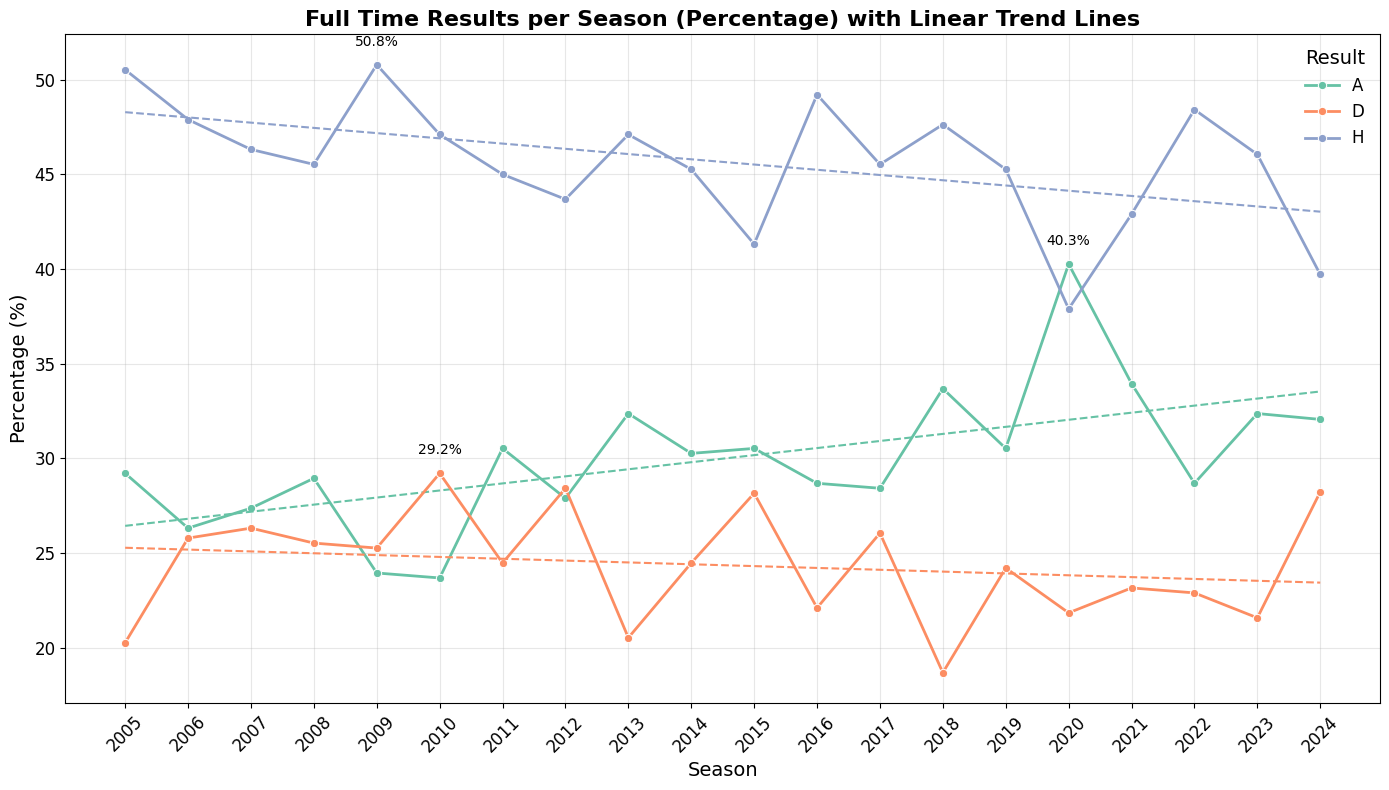

In [42]:

# Aggregating the data to get counts of each FTR result per Season
result_counts = result.groupby(['Season', 'FTR']).size().unstack(fill_value=0)

# Calculating percentages by dividing each count by the row total (season total)
result_percentages = result_counts.div(result_counts.sum(axis=1), axis=0) * 100


plt.figure(figsize=(14, 8))

palette = sns.color_palette("Set2", len(result_percentages.columns))

# Plotting each FTR line with a linear trendline
for idx, ftr in enumerate(result_percentages.columns):
    # Line plot
    sns.lineplot(
        x=result_percentages.index, 
        y=result_percentages[ftr], 
        marker="o", 
        label=ftr, 
        color=palette[idx], 
        linewidth=2
    )
    
    # Linear regression to calculate trend line
    x_numeric = np.arange(len(result_percentages)) 
    y_values = result_percentages[ftr]
    slope, intercept = np.polyfit(x_numeric, y_values, 1) 
    trend_line = slope * x_numeric + intercept
    
    # Plot the linear trend line
    plt.plot(
        result_percentages.index, 
        trend_line, 
        color=palette[idx], 
        linestyle="--", 
        linewidth=1.5
    )

# Annotate the highest point for each FTR
for ftr in result_percentages.columns:
    max_idx = result_percentages[ftr].idxmax()
    max_value = result_percentages[ftr].max()
    plt.text(
        x=max_idx, 
        y=max_value + 1, 
        s=f"{max_value:.1f}%", 
        color="black", 
        ha="center", 
        fontsize=10
    )

plt.title("Full Time Results per Season (Percentage) with Linear Trend Lines", fontsize=16, fontweight='bold')
plt.xlabel("Season", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title="Result", fontsize=12, title_fontsize=14, loc="upper right", frameon=False)
plt.tight_layout()


plt.savefig(os.path.join("..", "images", "full_time_results.png"))


plt.show()

In [30]:
result.to_csv(os.path.join("..","data","processed","all_concat_football_data.csv"), index=False)